[Ερώτημα 1: Πράξεις με Διανύσματα και Πίνακες]

(i)

In [ ]:
import numpy as np

np.random.seed(7)

X = np.random.rand(3, 4)
print("Random table of size 3x4\n")
print("X : ",X)


Y = np.random.rand(4, 3)
print("\nRandom table of size 4x3\n")
print("Υ : ",Y)

Random table of size 3x4

X :  [[0.07630829 0.77991879 0.43840923 0.72346518]
 [0.97798951 0.53849587 0.50112046 0.07205113]
 [0.26843898 0.4998825  0.67923    0.80373904]]

Random table of size 4x3

Υ :  [[0.38094113 0.06593635 0.2881456 ]
 [0.90959353 0.21338535 0.45212396]
 [0.93120602 0.02489923 0.60054892]
 [0.9501295  0.23030288 0.54848992]]


(ii)

In [ ]:
a = []
b = []

for i in range(0,4) :
  a.append(np.random.randint(1,10000))
  b.append(np.random.randint(1,100000))

print("Random vector\n")
print("a : ",a)
print("\nRandom vector\n")
print("b : ",b)


Random vector

a :  [8965, 9354, 7652, 7241]

Random vector

b :  [31215, 16216, 25796, 98132]


1.1

In [ ]:
a_np = np.array(a)
b_np = np.array(b)

ab = a_np * b_np

print(ab)

[279842475 151684464 197390992 710573812]


1.2

In [ ]:
aX = a * X

print(aX)

[[ 684.10381424 7295.36038261 3354.70743899 5238.61135267]
 [8767.67597505 5037.09037182 3834.57378793  521.72225666]
 [2406.55545661 4675.90091272 5197.46793032 5819.87436043]]


1.3

In [ ]:
XY = np.dot(X,Y)

print(XY)

[[1.83411298 0.3489869  1.03470742]
 [1.39747309 0.20846328 0.86573693]
 [1.95310857 0.32638321 1.15211197]]


1.4

In [ ]:
l2_norm_a = np.linalg.norm(a)

print(l2_norm_a)

16698.91391677914


[Ερώτημα 3: Gradient descent]


Optimized solution for f1: [1.99997244 2.99995866]


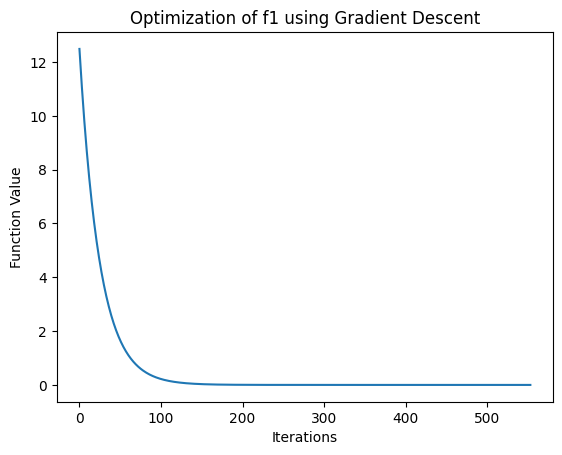


Optimized solution for f2: [-1.28428405 -1.14211345]


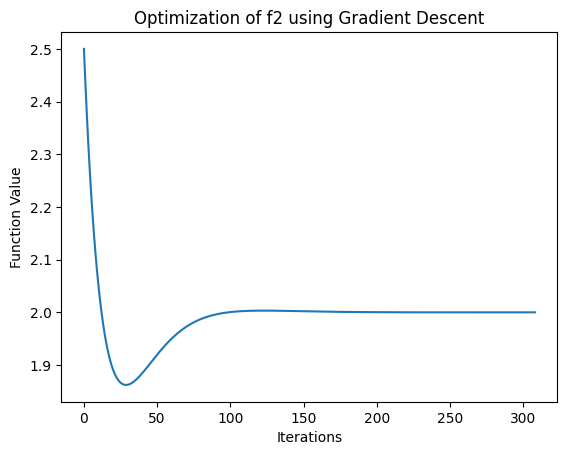

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, df, x_init, learning_rate, max_iter, tolerance):
    # Initialize the solution and iteration counter
    x = x_init
    iter_count = 0
    y = []

    # Perform gradient descent until the maximum number of iterations is reached
    while iter_count < max_iter:

        # Calculate the gradient of the function at the current point
        grad = df(x)

        # Update the solution using the gradient and learning rate
        x_next = x - learning_rate * grad

        # Check the tolerance level to stop the algorithm
        if np.linalg.norm(x_next - x) < tolerance:
            break

        # Update the solution, y array, and iteration counter
        x = x_next
        y.append(f(x))
        iter_count += 1

    return x, y

# Define the functions to optimize

def f1(x):
    return (x[0] - 2)**2 + (x[1] - 3)**2

def df1(x):
    return np.array([2*(x[0]-2), 2*(x[1]-3)])

def f2(x):
    # Scale the input variables
    x_scaled = (x - np.array([-3, 3])) / 10
    return (1 - (x_scaled[1]))**2 + 20*((x_scaled[0]) - (x_scaled[1])**2)**2

def df2(x):
    # Scale the input variables
    x_scaled = (x - np.array([-3, 3])) / 10
    return np.array([40*(x_scaled[0] - x_scaled[1]**2), -40*(x_scaled[1])*(2*x_scaled[1] - x_scaled[0] + 1)])

# Perform the optimization using Gradient Descent

x_init = np.array([0,0])
learning_rate = 0.01
max_iter = 10000
tolerance = 1e-6

# Optimize f1 and plot the results
x_opt1, y1 = gradient_descent(f1, df1, x_init, learning_rate, max_iter, tolerance)
print("\nOptimized solution for f1:", x_opt1)
plt.plot(range(len(y1)), y1)
plt.title("Optimization of f1 using Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()

# Optimize f2 and plot the results
x_opt2, y2 = gradient_descent(f2, df2, x_init, learning_rate, max_iter, tolerance)
print("\nOptimized solution for f2:", x_opt2)
plt.plot(range(len(y2)), y2)
plt.title("Optimization of f2 using Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()


(α) Αυξάνοντας σταδιακά από τις 10 επαναλήψεις στις 100, 500, 1000 , κατέληξα στις 10000 επαναλήψεις για να συγκλίνει ο αλγόριθμος σε στάσιμο σημείο . Αξίζει να αναφερθεί ότι για τις αρχικές τιμές max_iter=10 learning_rate=0.5 η f2 κάνει overflow.

(β) Για μεγάλες τιμές του learning rate(όταν τείνει στο 1) , παρατήρησα ότι ο αλγόριθμος δεν καταφέρνει να συγκλίσει σε στάσιμο σημείο και οι τιμές των f1,f2 δεν μικραίνουν.

(γ) Μικραίνοντας πολύ την τιμή του learning rate , παρατήρησα ότι οι τιμές τις f1,f2 αρχίζουν να τείνουν στο μηδέν.

(δ) Παρατηρώ ότι μεγαλώνοντας την χ μεταβλητή η f2 συγκλίνει πιο γρήγορα σε στάσιμο σημείο και μάλιστα σε διαφορετικό στάσιμο σημείο ενώ η f1 φαίνεται να μην επηρεάζεται.